In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 
                  'tau_reio',  'w0_fld'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 
                    0.06, -1])
left_steps = np.array([0.0001,    0.001,    0.01,   0.01e-9, 0.005, 
                    0.02, 0.01])
right_steps = np.array([0.0001,    0.001,    0.01,   0.01e-9, 0.005, 
                    0.02, 0.01])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-left_steps,
                  right=centers+right_steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'lensing': 'yes',
                   'non linear' : 'no',
                   'Omega_Lambda' : 0.0}
classy_template.update(fishchips.util.PRECISE_CLASS_DICT)

# generate the fiducial cosmology
obs.compute_cosmo(key='CLASS_fiducial',
                  classy_dict=fishchips.util.neutrino_dict(classy_template))

# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_CLASS_left', 
                      classy_dict=fishchips.util.neutrino_dict(classy_left))
    obs.compute_cosmo(key=par + '_CLASS_right',
                      classy_dict=fishchips.util.neutrino_dict(classy_right))
    

In [4]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 
                  'tau_reio',  'w0_fld'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 
                    0.06, -1])
left_steps = np.array([0.0001,    0.001,    0.01,   0.01e-9, 0.005, 
                    0.02, 0.1])
right_steps = np.array([0.0001,    0.001,    0.01,   0.01e-9, 0.005, 
                    0.02, 0.1])

big_obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-left_steps,
                  right=centers+right_steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'lensing': 'yes',
                   'non linear' : 'no',
                   'Omega_Lambda' : 0.0}
classy_template.update(fishchips.util.PRECISE_CLASS_DICT)

# generate the fiducial cosmology
big_obs.compute_cosmo(key='CLASS_fiducial',
                  classy_dict=fishchips.util.neutrino_dict(classy_template))

# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(big_obs.parameters, big_obs.left, big_obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    big_obs.compute_cosmo(key=par + '_CLASS_left', 
                      classy_dict=fishchips.util.neutrino_dict(classy_left))
    big_obs.compute_cosmo(key=par + '_CLASS_right',
                      classy_dict=fishchips.util.neutrino_dict(classy_right))
    

In [5]:
s4 = fishchips.experiments.get_S4()

In [7]:
classy_template

{'Omega_Lambda': 0.0,
 'accurate_lensing': 1,
 'k_max_tau0_over_l_max': 6,
 'l_max_scalars': 5000,
 'lensing': 'yes',
 'neglect_CMB_sources_below_visibility': 0.001,
 'non linear': 'no',
 'output': 'tCl pCl lCl',
 'perturb_sampling_stepsize': 0.01,
 'reionization_optical_depth_tol': 1e-07,
 'tol_background_integration': 0.001,
 'tol_perturb_integration': 1e-07,
 'tol_thermo_integration': 1e-07,
 'transfer_neglect_delta_k_S_e': 0.11,
 'transfer_neglect_delta_k_S_t0': 0.15,
 'transfer_neglect_delta_k_S_t1': 0.04,
 'transfer_neglect_delta_k_S_t2': 0.15}

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{w0\\_fld}$']
1 sigma w constraint, 0.012206781100385002
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{w0\\_fld}$']
0.012163556223052702


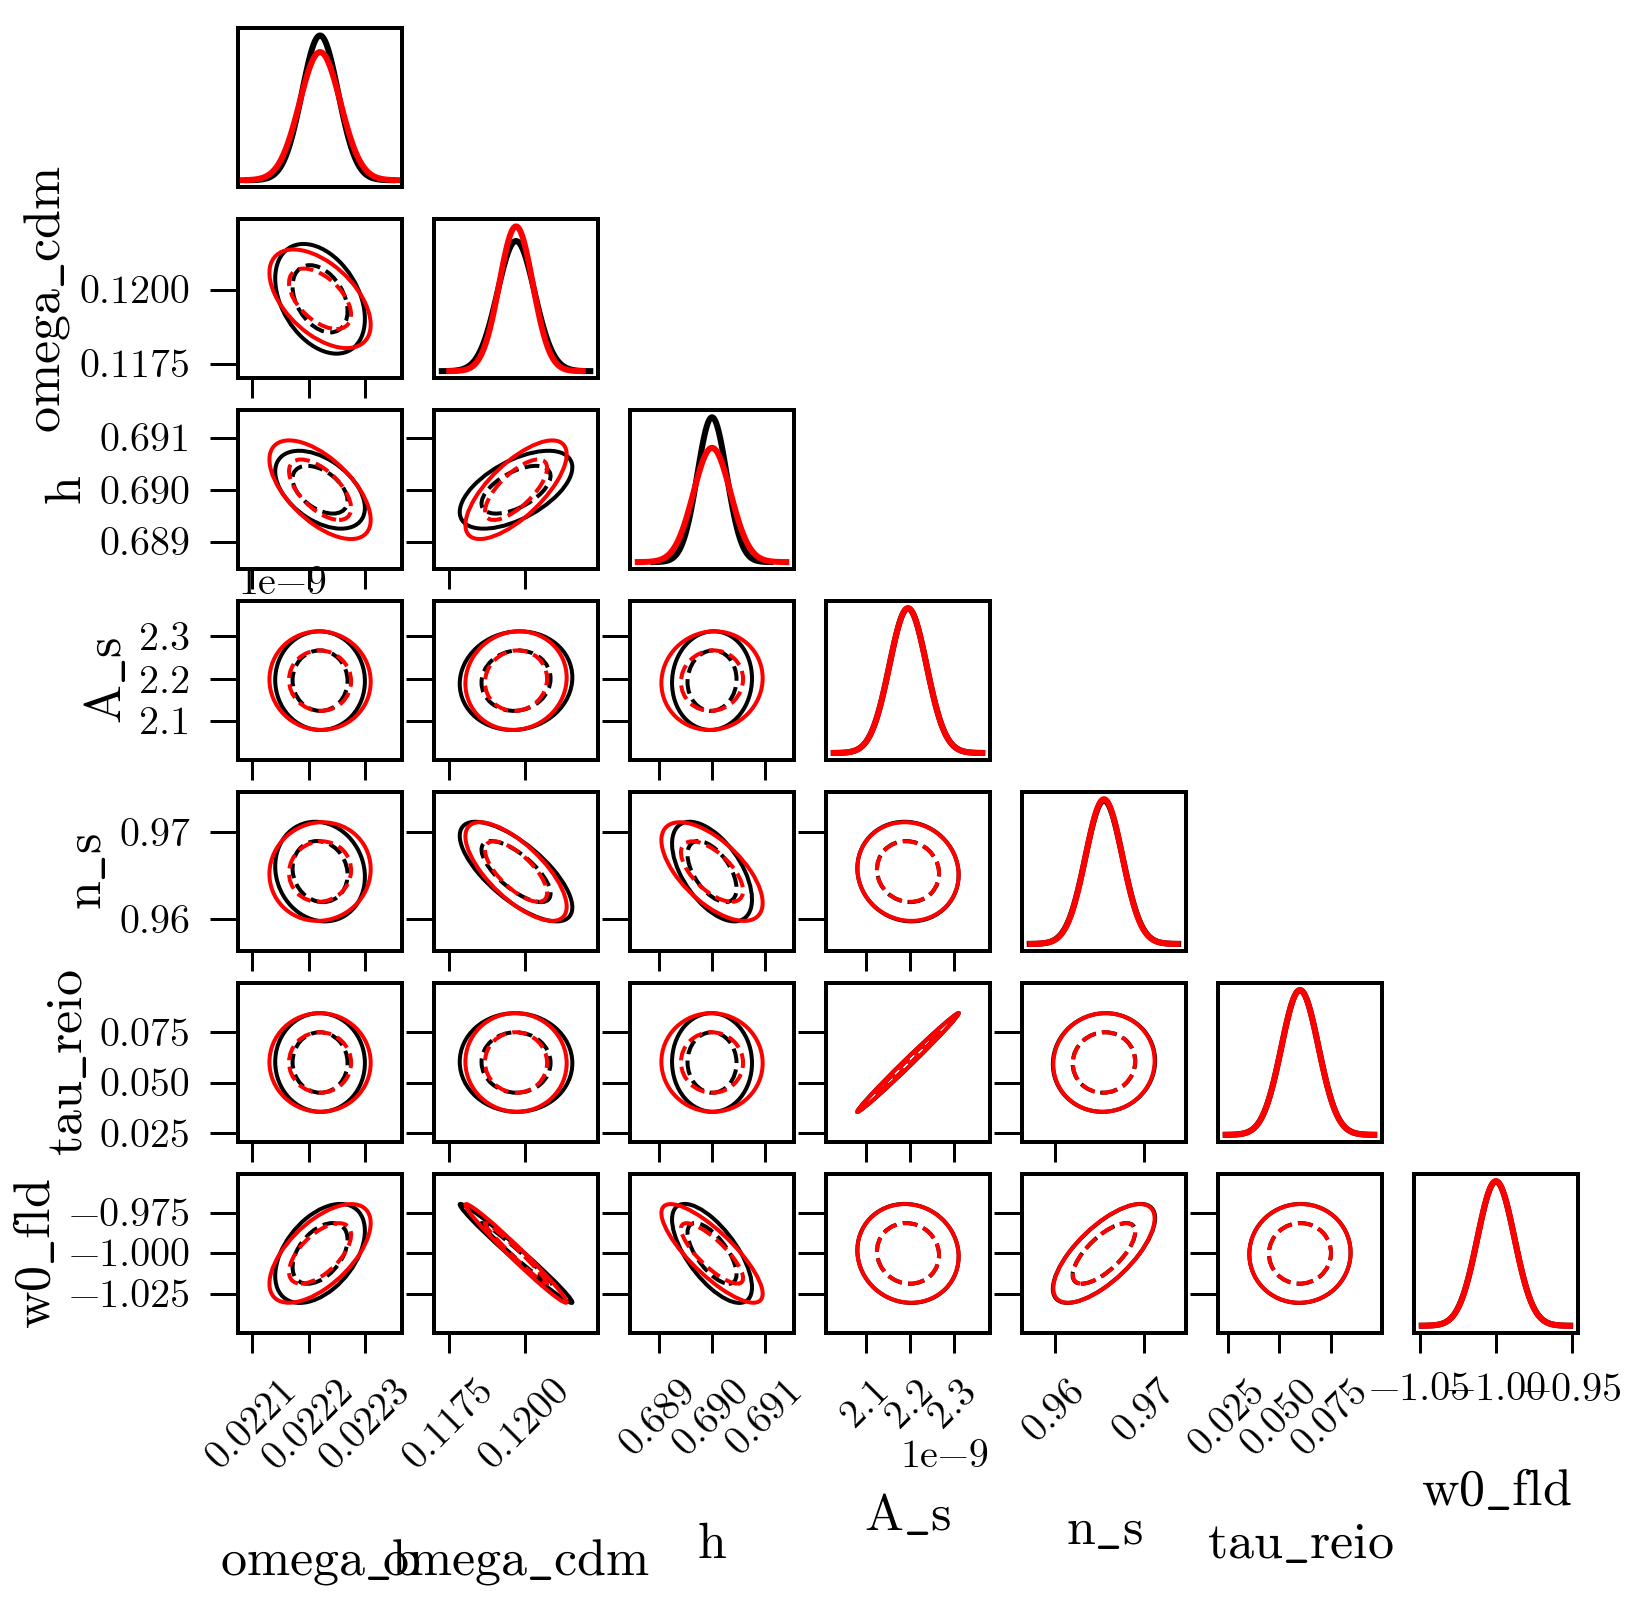

In [6]:
fisher = np.sum( [exp.get_fisher(obs, lensed_Cl=False) for exp in s4], axis=0 )
cov = np.linalg.inv(fisher)
fig, ax = fishchips.util.plot_triangle(obs, cov);
print('1 sigma w constraint,', np.sqrt( cov[-1,-1] ))

fisher = np.sum( [exp.get_fisher(big_obs, lensed_Cl=False) for exp in s4], axis=0 )
cov = np.linalg.inv(fisher)
fig, ax = fishchips.util.plot_triangle(big_obs, cov, fig, ax, color='red');
print(np.sqrt( cov[-1,-1] ))

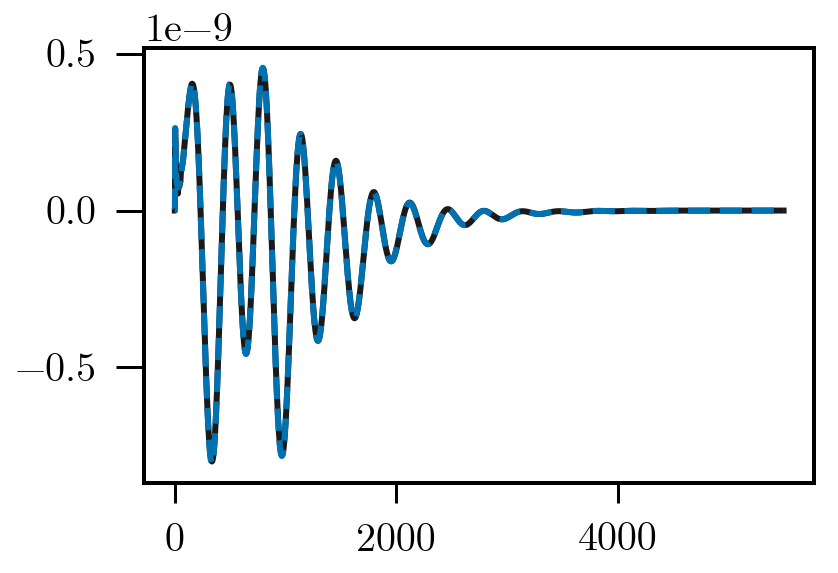

In [14]:
ell = obs.cosmos['CLASS_fiducial'].raw_cl()['ell']
for ch in ['tt']:
    fid_tt = obs.cosmos['CLASS_fiducial'].raw_cl()[ch]
    deriv = (obs.cosmos['w0_fld_CLASS_right'].raw_cl()[ch]
              -obs.cosmos['w0_fld_CLASS_left'].raw_cl()[ch])/0.02
    plt.plot( ell**2 * deriv )
    np.save(f'deriv_0.01step_{ch}.npy', deriv)

    fid_tt = big_obs.cosmos['CLASS_fiducial'].raw_cl()[ch]
    deriv = (big_obs.cosmos['w0_fld_CLASS_right'].raw_cl()[ch]
              -big_obs.cosmos['w0_fld_CLASS_left'].raw_cl()[ch])/0.2
    plt.plot( ell**2 * deriv, '--' )
    np.save(f'deriv_0.1step_{ch}.npy', deriv)

In [21]:
big_obs.cosmos['CLASS_fiducial'].raw_cl()['ell']

array([   0,    1,    2, ..., 5498, 5499, 5500])